In [10]:
from numpy import log2
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

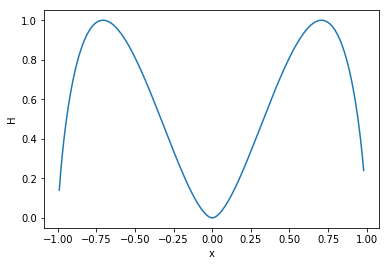

In [25]:
f = lambda h: -x**2 * log2(x**2) - (1 - x**2) * log2(1 - x**2)
x = np.arange(-0.99, 0.99, 0.01)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("H")
plt.show()

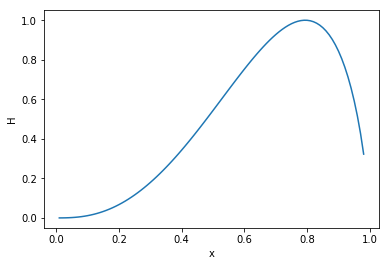

In [30]:
f = lambda h: -x**3 * log2(x**3) - (1 - x**3) * log2(1 - x**3)
x = np.arange(0.01, 0.99, 0.01)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("H")
plt.show()

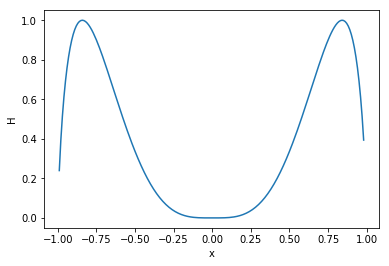

In [31]:
f = lambda h: -x**4 * log2(x**4) - (1 - x**4) * log2(1 - x**4)
x = np.arange(-0.99, 0.99, 0.01)
plt.plot(x, f(x))
plt.xlabel("x")
plt.ylabel("H")
plt.show()

In [47]:
from scipy.fftpack import dct
import scipy

In [55]:
example = np.array([[139, 144, 149, 153, 155, 155, 155, 155], 
              [144, 151, 153, 156, 159, 156, 156, 156], 
              [150, 155, 160, 163, 158, 156, 156, 156],
              [159, 161, 162, 160, 160, 159, 159, 159],
              [159, 160, 161, 162, 162, 155, 155, 155],
              [161, 161, 161, 161, 160, 157, 157, 157],
              [162, 162, 161, 163, 162, 157, 157, 157],
              [162, 162, 161, 161, 163, 158, 158, 158]])

In [56]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

In [59]:
dct_example = dct2(example)
np.set_printoptions(suppress=True)
print(dct_example)

[[1259.63   -1.03  -12.08   -5.2     2.13   -1.67   -2.71    1.32]
 [ -22.59  -17.48   -6.24   -3.16   -2.86   -0.07    0.43   -1.19]
 [ -10.95   -9.26   -1.58    1.53    0.2    -0.94   -0.57   -0.06]
 [  -7.08   -1.91    0.22    1.45    0.9    -0.08   -0.04    0.33]
 [  -0.62   -0.84    1.47    1.56   -0.12   -0.66    0.61    1.28]
 [   1.75   -0.2     1.62   -0.34   -0.78    1.48    1.04   -0.99]
 [  -1.28   -0.36   -0.32   -1.46   -0.49    1.73    1.08   -0.76]
 [  -2.6     1.55   -3.76   -1.84    1.87    1.21   -0.57   -0.45]]


----------------

In [78]:
def dct2(a):
    return scipy.fftpack.dct(scipy.fftpack.dct(a, axis=0, norm='ortho'), axis=1, norm='ortho')

In [79]:
q4 = np.array([[188, 180, 155, 149, 179, 116,  86,  96],
               [168, 179, 168, 174, 180, 111,  86,  95],
               [150, 166, 175, 189, 165, 101,  88,  97],
               [163, 165, 179, 184, 135,  90,  91,  96],
               [170, 180, 178, 144, 102,  87,  91,  98],
               [175, 174, 141, 104,  85,  83,  88,  96],
               [153, 134, 105,  82,  83,  87,  92,  96],
               [117, 104,  86,  80,  86,  90,  92, 103]])

In [97]:
dct_q4 = dct2(q4)
np.set_printoptions(suppress=True)
print(dct_q4)
q_dct_q4 = np.round(dct_q4 / 100).astype(int)
print(q_dct_q4)

[[1016.25  215.97   -6.82  -27.17   29.25  -20.76  -11.25    7.95]
 [ 136.15   52.63  -93.46   -7.27   34.01  -18.82  -11.26   10.64]
 [ -45.86  -49.21   13.92   53.76   11.1   -24.67   -0.15    8.41]
 [   8.84   38.07   47.95   15.61  -17.87  -10.85    4.17    3.68]
 [  -1.25   -5.92   -1.24   -4.72    0.75    6.6     4.84    0.24]
 [  -4.47   -1.2     3.35    8.12    7.01    6.12   -0.15    1.19]
 [  -2.92   -2.12    0.85   -1.46    0.     -3.36   -0.92   -1.22]
 [  -0.82   -3.38   -0.59   -1.8    -4.2    -1.26    2.32    1.63]]
[[10  2  0  0  0  0  0  0]
 [ 1  1 -1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [98]:
def zigzag(a):
    n = len(a)
    z = np.empty([n*n], dtype=int)
    ind = -1
    bound = 0
    for i in range(0, 2 * n - 1):
        bound = 0 if i < n else i - n + 1
        for j in range(bound, i - bound + 1):
            ind += 1
            z[ind] = a[j, i-j] if i % 2 == 1 else a[i-j, j]
    return z

In [99]:
zigzag(q_dct_q4)

array([10,  2,  1,  0,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [102]:
np.round(np.array([-0.53]))

array([-1.])